#  Clustering Analysis

## Bert Based Clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bert_clusters = pd.read_csv("clustering_bert_results.csv")
bert_clusters_hierarchial = bert_clusters[bert_clusters["method"] == "hierarchical"]
bert_clusters_kmeans = bert_clusters[bert_clusters["method"] == "kmeans"]
bert_clusters_hdbscan =  bert_clusters[bert_clusters["method"] == "hdbscan"]
print(bert_clusters_hierarchial.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 1 to 73
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  37 non-null     int64  
 1   n_clusters                  37 non-null     int64  
 2   method                      37 non-null     object 
 3   avg_intra_per_cluster       37 non-null     object 
 4   mean_intra_overall          37 non-null     float64
 5   avg_inter_between_clusters  37 non-null     float64
 6   silhouette_coefficient      37 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.3+ KB
None


In [3]:
print(bert_clusters[bert_clusters["method"] == "hierarchical"]["silhouette_coefficient"].head())

1   -0.001569
3    0.001111
5    0.005203
7    0.008051
9    0.009959
Name: silhouette_coefficient, dtype: float64


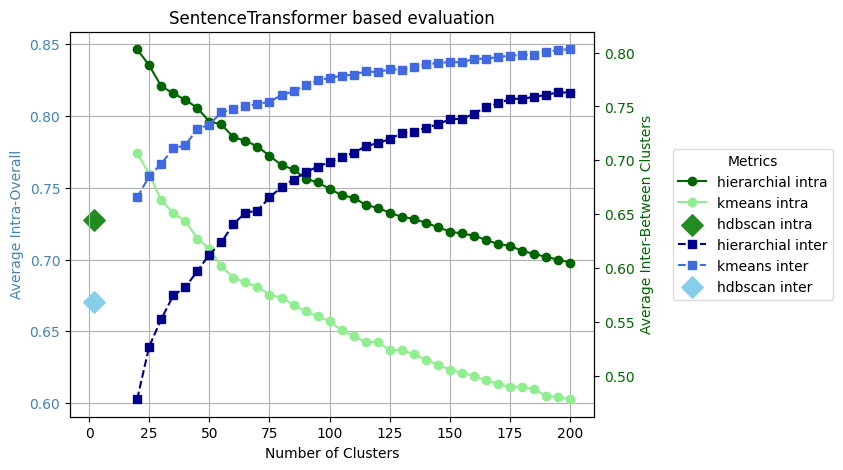

In [4]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 5))

# --- Left Y-axis: intra-cluster ---
lns1 = ax1.plot(
    bert_clusters_hierarchial["n_clusters"],
    bert_clusters_hierarchial["mean_intra_overall"],
    marker="o",
    color="darkgreen",
    label="hierarchial intra"
)
lns2 = ax1.plot(
    bert_clusters_kmeans["n_clusters"],
    bert_clusters_kmeans["mean_intra_overall"],
    marker="o",
    color="lightgreen",
    label="kmeans intra"
)
ax1.scatter(
    bert_clusters_hdbscan.iloc[0]["n_clusters"],
    bert_clusters_hdbscan.iloc[0]["mean_intra_overall"],
    color="forestgreen", marker="D", s=120,
    label="hdbscan intra"
)

ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Average Intra-Overall", color="steelblue")
ax1.tick_params(axis="y", labelcolor="steelblue")
ax1.grid(True)

# --- Right Y-axis: inter-cluster ---
ax2 = ax1.twinx()
lns3 = ax2.plot(
    bert_clusters_hierarchial["n_clusters"],
    bert_clusters_hierarchial["avg_inter_between_clusters"],
    marker="s",
    linestyle="--",
    color="darkblue",
    label="hierarchial inter"
)
lns4 = ax2.plot(
    bert_clusters_kmeans["n_clusters"],
    bert_clusters_kmeans["avg_inter_between_clusters"],
    marker="s",
    linestyle="--",
    color="royalblue",
    label="kmeans inter"
)
ax2.scatter(
    bert_clusters_hdbscan.iloc[0]["n_clusters"],
    bert_clusters_hdbscan.iloc[0]["avg_inter_between_clusters"],
    color="skyblue", marker="D", s=120,
    label="hdbscan inter"
)

ax2.set_ylabel("Average Inter-Between Clusters", color="darkgreen")
ax2.tick_params(axis="y", labelcolor="darkgreen")

# --- Make room on the right for y2 label + legend ---
fig.subplots_adjust(right=0.78)  # shrink axes width a bit

# --- Legend outside, not overlapping y2 labels ---
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

leg = ax1.legend(
    h1 + h2,
    l1 + l2,
    loc="center left",
    bbox_to_anchor=(1.15, 0.5),  # move legend further right
    borderaxespad=0.0,
    title="Metrics",
    frameon=True,
    fancybox=True,
    framealpha=0.7
)

plt.title("SentenceTransformer based evaluation")
plt.show()


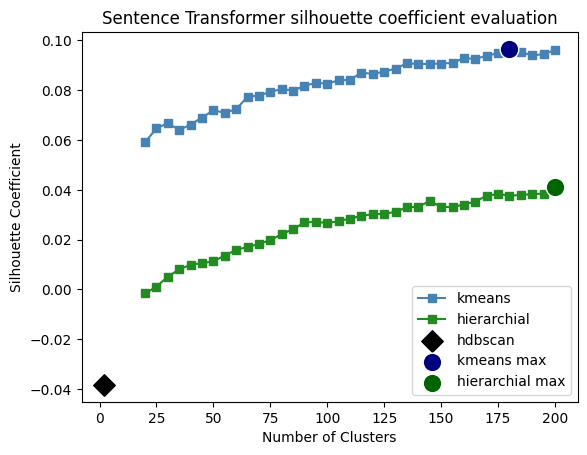

180


In [5]:
plt.plot(bert_clusters_kmeans["n_clusters"], bert_clusters_kmeans["silhouette_coefficient"], marker = "s", color = "steelblue", linestyle = "-", label = "kmeans")
plt.plot(bert_clusters_hierarchial["n_clusters"], bert_clusters_hierarchial["silhouette_coefficient"], marker = "s", color = "forestgreen", linestyle = "-", label = "hierarchial")
plt.scatter(bert_clusters_hdbscan.iloc[0]["n_clusters"], bert_clusters_hdbscan.iloc[0]["silhouette_coefficient"], color = "black", marker = "D", s = 120, label = "hdbscan")
kmeans_max_idx = bert_clusters_kmeans["silhouette_coefficient"].idxmax()
plt.scatter(
    bert_clusters_kmeans.loc[kmeans_max_idx, "n_clusters"],
    bert_clusters_kmeans.loc[kmeans_max_idx, "silhouette_coefficient"],
    color="navy", edgecolor="white", s=180, zorder=5, label="kmeans max"
)

# --- highlight max for Hierarchical ---
hier_max_idx = bert_clusters_hierarchial["silhouette_coefficient"].idxmax()
plt.scatter(
    bert_clusters_hierarchial.loc[hier_max_idx, "n_clusters"],
    bert_clusters_hierarchial.loc[hier_max_idx, "silhouette_coefficient"],
    color="darkgreen", edgecolor="white", s=180, zorder=5, label="hierarchial max"
)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Sentence Transformer silhouette coefficient evaluation")
plt.legend()
plt.show()
print(bert_clusters_kmeans.loc[kmeans_max_idx, "n_clusters"])

## Graph Based

In [6]:
graph_clusters = pd.read_csv("clustering_graph_results_0811.csv")
graph_clusters_hierarchial = graph_clusters[graph_clusters["method"] == "hierarchical"]
graph_clusters_kmeans = graph_clusters[graph_clusters["method"] == "kmeans"]
graph_clusters_hdbscan =  graph_clusters[graph_clusters["method"] == "hdbscan"]

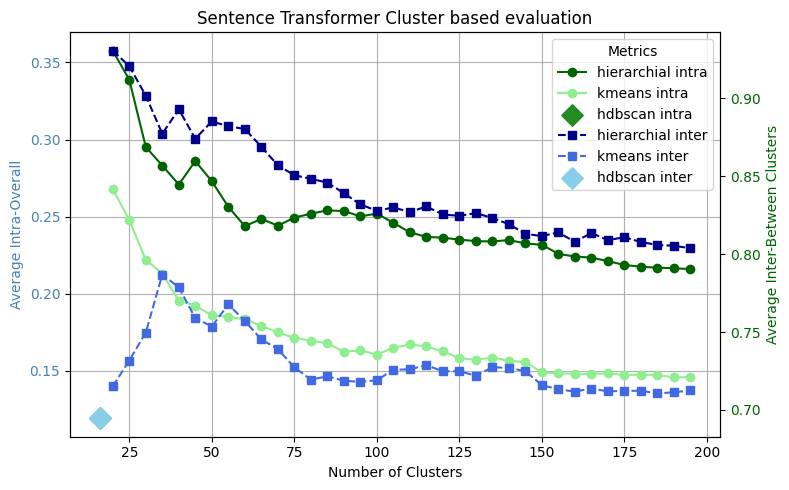

In [7]:
fig, ax1 = plt.subplots(figsize=(8, 5))

# --- Left Y-axis: intra-cluster ---
lns1 = ax1.plot(
    graph_clusters_hierarchial["n_clusters"],
    graph_clusters_hierarchial["mean_intra_overall"],
    marker="o",
    color="darkgreen",
    label="hierarchial intra"
)
lns2 = ax1.plot(
    graph_clusters_kmeans["n_clusters"],
    graph_clusters_kmeans["mean_intra_overall"],
    marker="o",
    color="lightgreen",
    label="kmeans intra"
)
# for hdbscan pint
ax1.scatter(
    graph_clusters_hdbscan.iloc[0]["n_clusters"], graph_clusters_hdbscan.iloc[0]["mean_intra_overall"], 
    color = "forestgreen", marker = "D", s = 120, 
    label = "hdbscan intra"
)


ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Average Intra-Overall", color="steelblue")
ax1.tick_params(axis="y", labelcolor="steelblue")
ax1.grid(True)

# --- Right Y-axis: inter-cluster ---
ax2 = ax1.twinx()  # create secondary y-axis that shares the same x
lns3 = ax2.plot(
    graph_clusters_hierarchial["n_clusters"],
    graph_clusters_hierarchial["avg_inter_between_clusters"],
    marker="s",
    linestyle="--",
    color="darkblue",
    label="hierarchial inter"
)
lns4 = ax2.plot(
    graph_clusters_kmeans["n_clusters"],
    graph_clusters_kmeans["avg_inter_between_clusters"],
    marker="s",
    linestyle="--",
    color="royalblue",
    label="kmeans inter"
)
ax2.scatter(
    graph_clusters_hdbscan.iloc[0]["n_clusters"], graph_clusters_hdbscan.iloc[0]["avg_inter_between_clusters"], 
    color = "skyblue", marker = "D", s = 120, 
    label = "hdbscan inter"
)

ax2.set_ylabel("Average Inter-Between Clusters", color="darkgreen")
ax2.tick_params(axis="y", labelcolor="darkgreen")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="best", title="Metrics")

plt.title("Sentence Transformer Cluster based evaluation")
plt.tight_layout()
plt.show()

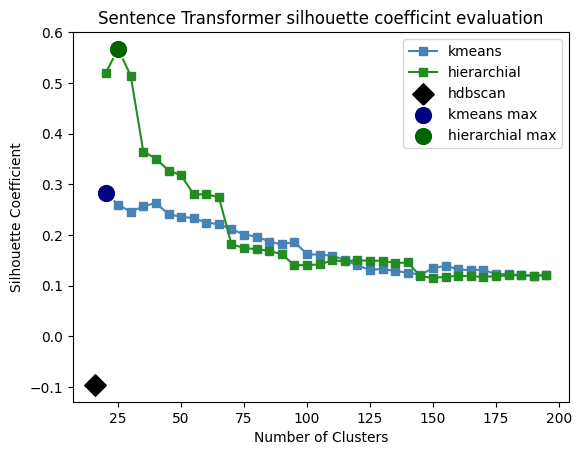

Unnamed: 0                                                                    3
n_clusters                                                                   25
method                                                             hierarchical
avg_intra_per_cluster         {np.int64(0): np.float64(0.12798866806714151),...
mean_intra_overall                                                     0.338839
avg_inter_between_clusters                                             0.920614
silhouette_coefficient                                                 0.567186
Name: 3, dtype: object


In [8]:
plt.plot(graph_clusters_kmeans["n_clusters"], graph_clusters_kmeans["silhouette_coefficient"], marker = "s", color = "steelblue", linestyle = "-", label = "kmeans")
plt.plot(graph_clusters_hierarchial["n_clusters"], graph_clusters_hierarchial["silhouette_coefficient"], marker = "s", color = "forestgreen", linestyle = "-", label = "hierarchial")
plt.scatter(graph_clusters_hdbscan.iloc[0]["n_clusters"], graph_clusters_hdbscan.iloc[0]["silhouette_coefficient"], color = "black", marker = "D", s = 120, label = "hdbscan")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Sentence Transformer silhouette coefficint evaluation")

kmeans_max_idx = graph_clusters_kmeans["silhouette_coefficient"].idxmax()
plt.scatter(
    graph_clusters_kmeans.loc[kmeans_max_idx, "n_clusters"],
    graph_clusters_kmeans.loc[kmeans_max_idx, "silhouette_coefficient"],
    color="navy", edgecolor="white", s=180, zorder=5, label="kmeans max"
)

# --- highlight max for Hierarchical ---
hier_max_idx = graph_clusters_hierarchial["silhouette_coefficient"].idxmax()
plt.scatter(
    graph_clusters_hierarchial.loc[hier_max_idx, "n_clusters"],
    graph_clusters_hierarchial.loc[hier_max_idx, "silhouette_coefficient"],
    color="darkgreen", edgecolor="white", s=180, zorder=5, label="hierarchial max"
)

plt.legend()
plt.show()
print(graph_clusters_hierarchial.loc[graph_clusters_hierarchial["silhouette_coefficient"].idxmax()])

# Extraction of clusters

In [9]:
import pickle

counter = 0
with open("clustering_memberships_0811.pkl", "rb") as f:
    dict = pickle.load(f)
    keys = dict.keys()
    result = dict.get("hierarchical_25")

import pickle
with open("embeddings_graph_0811.pkl", "rb") as f:
    df = pickle.load(f)

    
clusters = {}

for cluster in result.keys():
    clusters[cluster] = df.iloc[result.get(cluster)]["skill"]

for n in clusters.keys():
    length = len(clusters.get(n).tolist())
    if length < 100: #and n not in [7, 8, 9, 12]:
        print("=========================================")
        print(f"cluster number: {n} with length {len(clusters.get(n))}")
        print(clusters.get(n).tolist())
# --> practically useless :)


cluster number: 7 with length 35
['digital game creation systems', 'video conferencing tool', 'define database physical structure', 'use digital device operating systems', 'adapt to acting roles', 'analyse supply chain strategies', 'nuclear physics', 'analyse problems for opportunities', 'computer graphics', 'carry picking work aids', 'resolve conflicts', 'show empathy', 'trading software', 'graphics editor software', 'moderate a discussion', 'sexual disorders', 'ensure positive relations within the artistic team', 'demonstrate loyalty', 'protect ICT devices', 'create scenery display', 'interpret mathematical information', 'use presentation software', 'coordinate forestry research', 'types of cylindrical grinding processes', 'move objects', 'respect confidentiality obligations', 'use online communication tools', 'write leasing reports', 'show entrepreneurial spirit', 'holography', 'maintain physical fitness', 'penetration testing tool', 'inspect quality of products', 'use spreadsheets 

In [10]:
import pickle
with open("embeddings_graph_0811.pkl", "rb") as f:
    df = pickle.load(f)
    print(df.head())
    print(df.info())
    print(len(df))

                        skill  \
0    conduct shearing of wool   
1  use concurrent programming   
2         feed mirror machine   
3         analyse legislation   
4        develop prop effects   

                                                 uri         0         1  \
0  http://data.europa.eu/esco/skill/f313b675-d15b... -0.123249  0.064023   
1  http://data.europa.eu/esco/skill/25b291b5-8245... -0.097261 -0.112874   
2  http://data.europa.eu/esco/skill/33dd30c8-848d... -0.062658 -0.081702   
3  http://data.europa.eu/esco/skill/6e5b66f0-ff0b... -0.297912  0.106891   
4  http://data.europa.eu/esco/skill/4b82975f-6d38... -0.111846 -0.033911   

          2         3         4         5         6         7  ...       118  \
0  0.042934  0.057107 -0.098111  0.123551 -0.063454 -0.042804  ...  0.101601   
1 -0.113779  0.097987  0.068661  0.110483 -0.077311  0.100981  ... -0.061895   
2  0.047015  0.090267 -0.046392  0.092675 -0.090492 -0.077023  ...  0.079216   
3 -0.062588  0.095667  0

Since the best clusters from the graph embeddings provide only theoretically good results, we try with the hierarchial25 of the bert model.

In [11]:
bert_results = pd.read_csv("results_best_bert.csv")
print(bert_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14257 entries, 0 to 14256
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14257 non-null  int64 
 1   skill       14257 non-null  object
 2   cluster     14257 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 334.3+ KB
None


In [12]:
cluster_map = bert_results.groupby("cluster")["skill"].apply(list).to_dict()
for cluster_n in cluster_map.keys():
    if cluster_n not in list(range(1, 200)):
        continue
    # print(f"cluster_number {cluster_n} with length {len(cluster_map.get(cluster_n))}")
    print(f"{cluster_n}: {cluster_map.get(cluster_n)}")
umbrella_terms = [
    "Specialised technical equipment handling, pyrotechnics & props management",
    "Medical devices, diagnostic procedures & vascular/blood-related care",
    "Historical, biological & ecological research and conservation",
    "Legal compliance, insurance & enterprise risk management",
    "Advanced nursing, patient care & health services management",
    "Industrial machinery operation, metalworking & manufacturing processes",
    "Clinical neuroscience, psychiatry & psychotherapeutic practice",
    "Surveillance, sensing, scanning & inspection systems operation",
    "Industrial fluid processing, distillation & edible oil operations",
    "Pharmaceutical chemistry, medication management & controlled substances regulation",
    "Product, furniture, interior & software/system design",
    "Customer service, client relations & contract negotiation/management",
    "Mining operations, geotechnical works, fire safety & flood remediation",
    "Astronomy, satellite monitoring & literature/media production and standards",
    "Food production, processing, product development & safety/quality management",
    "Imaging, photography, video production & computer vision/medical imaging",
    "Digital game development, casino operations & gambling/betting management",
    "Ceramic crafting, extrusion processes & surface finishing in construction",
    "Rail and tram transport operations, safety & infrastructure management",
    "Pregnancy, childbirth & paediatric care plus aquaculture reproduction management",
    "Snow removal operations & cloud computing architecture/operations",
    "Drilling operations, welding & forging, and barrel/wicker product manufacturing",
    "Equipment maintenance, inspections, and business process & quality management",
    "Licensing and tax administration, property appraisal & heritage conservation",
    "Musculoskeletal care, chiropractic & physiotherapy practice, and surgical/anaesthetic support",
    "International business development, mobility & travel services, and e-government/EU frameworks",
    "Sports coaching, fitness training & exercise science, and sport event/club management",
    "Footwear and leather goods design, manufacturing & marketing, with foot/skin care and cosmetics",
    "Heavy machinery & lifting/rigging operations, and electromechanical/mechatronic & prosthetic-orthotic systems",
    "Corporate strategy, marketing & brand management, and financial markets & asset management",
    "Human resources, training & occupational health/ergonomics, and work organisation & time management",
    "Artistic design, illustration & prototyping for fashion, products and multimedia campaigns",
    "Rubber and leather goods manufacturing, surface finishing and advanced materials engineering",
    "Cutting, sawing & surface finishing of materials, and related cleaning, polishing & preparation",
    "Cleaning operations, hygiene & sanitation management, and ventilation/air quality systems",
    "Multilingual communication, translation & interpreting, and language teaching",
    "Multilingual proficiency, linguistics & philology across modern and classical languages",
    "ICT systems, networking & security, and telecommunications & digital media operations",
    "Systems engineering, hybrid/energy & IT architectures, and structured problem solving/feasibility analysis",
    "Viticulture & oenology (grape growing and wine making) and fruit/vegetable processing & advising",
    "Databases, query & search technologies, and data engineering & business intelligence",
    "Waste management operations, environmental protection, and sustainability policy & education",
    "Biomedical and microbiological laboratory techniques, sterilisation, and microelectronics/MEMS systems",
    "Real estate and housing services, loan and credit risk management, and debt/rental administration",
    "Budgeting, cost estimation, and economic analysis for resource allocation and programme evaluation",
    "Military operations, firearms and ammunition handling, and weapons-related set construction for stage/film",
    "Software development, CAD and office applications, and application usability/computer literacy",
    "Recruitment and HR motivation, marketing and advertising campaigns, and community/political outreach",
    "Sales, pricing and revenue management, including auctions, forecasting, and competitive analysis",
    "Immigration and international law practice, human rights protection, and legal claims/court procedures",
    "Scientific and business research, multi-project management, and foreign affairs, governance & innovation",
    "Inspection, quality control and HACCP, cleaning/disinfection processes, and brush/bristle manufacturing",
    "Physics, geometry and mechanics, including quantum/computational mechanics and balance/kinetics",
    "Grain and starch production processes, semiconductor wafer manufacturing, and spa/kitchen infrastructure operations",
    "Textile and apparel manufacturing, wire/rope handling, and textile testing, finishing & marketing",
    "Cosmetics and make-up, costume and fashion design, and tanning/dyeing of hides, skins and textiles",
    "Optics and optomechanical engineering, ophthalmology and visual rehabilitation, and optical equipment/projection",
    "Animal artificial reproduction and reproductive health, toy and games design/repair, and related wellness practices",
    "Simulation and modelling, shift and production scheduling, and performance measurement & continuous improvement",
    "Veterinary medicine, animal welfare and breeding, and zoo/wildlife management and animal training/therapy",
    "Cultural venue management, intercultural and religious services, and greeting card and spirits-related activities",
    "Information management, data evaluation, and technical signalling/traceability systems",
    "Call centre and correspondence handling, remote communications, and call quality management",
    "Complementary, alternative and physical therapies (osteopathy, massage, acupuncture, oncology, orthopaedics)",
    "Technical writing and drafting combined with engraving, embossing, and flexographic printing processes",
    "Building construction and concrete/masonry operations with landscape and building systems design",
    "Material cutting and shearing operations with adhesive bonding and crushing for diverse materials",
    "Gas and lime processing, carbonation operations, and vacuum/vat-based industrial processes",
    "Personal and family relationship counselling combined with locks, locksmithing, and locking systems",
    "Equipment and device disassembly, demolition techniques, and operational continuity/contingency planning",
    "Political communication, legislation and advocacy, public relations, and journalistic/media practices",
    "Biomedical and clinical sciences, biotechnology, and alternative cultivation systems (hydroponics/aquaponics)",
    "Electronics hardware, embedded/automation systems, Internet of Things, and control engineering",
    "Lighting and laser technologies for stage, industrial, and therapeutic applications",
    "Financial planning, products and services, public finance, and financial risk/market management",
    "Processing and quality control of tobacco, coffee, cocoa, tea, and related food/beverage products",
    "Dance and theatre performance, choreography, puppetry, and performer coaching/talent development",
    "Publishing and editorial processes with membership, accounts, mail handling, and digital identity management",
    "Landscaping, turf and horticulture, soil/ecosystem management, and green/ground-related building practices",
    "Web content management and development combined with blockchain architectures, applications, and smart contracts",
    "Electrical wiring and power distribution with control panels, integrated circuits, and related equipment",
    "Aviation operations, airport management, and flight safety/training procedures",
    "Metallurgy, materials testing, gemstones, and jewellery design and fabrication",
    "Strategic planning and data-driven decision-making in urban, clinical, technical, and marketing contexts",
    "Bathing, washing and laundry operations with associated baths and low-voltage electrical installations",
    "Official signage, notices, oaths, and sworn/sign-language communication",
    "Crisis and emergency response in health and social contexts, including domotics and movement techniques",
    "Instrumentation engineering, calibration, clocks/watches, and metering/measurement systems",
    "Documentation, archives, and library/records and collection management",
    "Communication skills, feedback handling, public speaking, and communication disorder support",
    "Tourism and hospitality facilities, destination management, and sustainable tourism development",
    "Mapping, transcription, and homologation-related documentation processes",
    "Monitoring, auditing, and reporting of operations, assets, and organisational processes",
    "Electrical engineering, electroplating, batteries, and household/vehicle electrical systems",
    "Data analysis, statistics, quantitative measurement, and business/technical analytics",
    "Agricultural production, crops and livestock management, animal nutrition, and agricultural policy",
    "Floor, wall and ceiling coverings, carpets/tiles, and menu planning in hospitality environments",
    "Geolocation, navigation, traffic and parking regulation, and geographic information systems",
    "Forensic investigations, criminology, biometrics, and crime scene examination",
    "Vehicle operation, driving, automotive technology, and dealership/service management",
    "Mechanical pressing operations, pressure control, and stress analysis of materials and equipment",
    "Nuclear medicine, radiology, radiotherapy, and radiation protection/emergency management",
    "Music performance, audio engineering, audiology, musical instrument production, and music therapy",
    "Visual arts, graphic design, artistic production management, and art therapy practice",
    "Meteorology, climate science, air quality management, wind energy, and HVAC for built and aviation environments",
    "Financial accounting, banking operations, cash/flow management, and regulatory financial monitoring",
    "Youth work, community development, humanitarian aid, volunteering, and special needs support",
    "Dairy and cheese production combined with moulding and casting processes in manufacturing",
    "Languages, logic and grammar, programming and scripting tools, and specialised software/IT utilities",
    "Advanced surgical and invasive medical procedures, transplantation, and emergency resuscitation care",
    "Education, pedagogy, curriculum and e-learning design across subjects and learner groups",
    "Social work practice, social security case management, and protection/advocacy for service users",
    "Ethics, leadership, person-centred care, and socially responsible/participatory practice",
    "Coating, insulation, drying, preservation, and cooling systems for materials and pipelines",
    "Surveying and measurement for land, environment, and socio-economic data collection and analysis",
    "Production, warehousing, procurement, spare parts, and supply chain/logistics management",
    "Health and safety management, safety engineering, and emergency planning/response",
    "Passenger and visitor services, escorting, booking/ticketing, and accessibility management",
    "Glass and fibreglass fabrication, treatment, handling, and related packaging/signalling equipment",
    "Storage, inventory and stock control, valuables handling, and physical/digital data preservation",
    "Classification of materials, products, vehicles, weapons, and technical components",
    "Pathology, cytology, otorhinolaryngology, and human anatomical diagnostics",           # 121
    "Operating systems installation and software configuration management",                 # 122
    "Stakeholder liaison, strategic management, and socio-economic development",            # 123
    "Event, exhibition, museum, circus, and amusement park management",                     # 124
    "Legal proceedings, victim support, and psychotherapeutic counselling",                 # 125
    "Soap and honey production processes and related equipment operation",                  # 126
    "Restaurant and food service operations and multi-channel distribution management",     # 127
    "Product, sample, and content labelling, terminology, and naming strategies",           # 128
    "Energy and fuel systems, resource management, and efficiency analysis",                # 129
    "Bridge engineering, airspace and level crossing operations, and safety management",    # 130
    "Product, paper and PCB printing, packaging design, and quality control",               # 131
    "Forest management, timber harvesting, and wood processing and conservation",           # 132
    "Equine care and training, bicycle mechanics, and tyre maintenance and sales",          # 133
    "Team leadership, teamwork facilitation, inclusion, and coordinated rescue operations", # 134
    "Construction and offshore infrastructure projects, scaffolding, and site logistics",   # 135
    "Testing, examination, and grading of materials, systems, and learners",                # 136
    "Data and record collection, recording, ETL, and information maintenance",              # 137
    "Branches of law and domain-specific legal terminology",                                # 138
    "Belt fabrication, upholstery production and repair, and conveyor/bar support work",    # 139
    "Programming and computing, data mining and machine learning, and applied mathematics", # 140
    "Hairdressing, depilation, perfumery, and floral design services",                           # 141
    "Multimodal logistics, cargo handling, and international trade compliance",                 # 142
    "Ceramic and enamel production, kiln operations, and mineral/raw material processing",      # 143
    "Toxicology, contamination control, pest management, and biosecurity",                      # 144
    "Trend analysis, forecasting, and recommendation of products and services",                 # 145
    "Nutrition and dietetics, public health promotion, and lifestyle counselling",              # 146
    "Thermal energy systems, heating and cooling equipment, and temperature control processes", # 147
    "Endocrinology and gynaecology care with coordinated guest support services",               # 148
    "Weighing operations and baggage/cargo loading for transport and logistics",                # 149
    "Maritime vessel operation, navigation, safety, and regulatory compliance",                 # 150
    "Assembly of mechanical and electronic components using precision engineering and machinery",# 151
    "Requirements analysis, technical specifications, and guideline creation",                   # 152
    "Psychology of human behaviour, assessment, and therapeutic intervention strategies",        # 153
    "Retail sales, ticketing, and promotional activities with customer engagement",             # 154
    "Solar energy and sprinkler system design, installation, and outdoor activity guidance",     # 155
    "Mortuary and funeral services, palliative care, and bereavement support",                  # 156
    "Terrazzo flooring installation and maintenance and tumbling-based finishing processes",    # 157
    "Medical diagnosis of urological and rheumatic disorders and detection of anomalies",        # 158
    "Water resource management, treatment and quality control, irrigation, and water-based operations", # 159
    "Pipeline, sewer, and drainage system design, installation, inspection, and maintenance",   # 160
    "Rule-setting and protective barrier construction in combat sports, games, networks, and buildings",  # 161
    "Ceiling installation and filament/centrifugal processing operations",                                # 162
    "Clinical immunology, allergy and vaccine management, and medical genetics",                          # 163
    "Windshield and roof installation, repair, and maintenance for vehicles and buildings",               # 164
    "Astrology, theology, and philosophical–religious study and practice",                                # 165
    "Stage performance, directing, and venue and entertainment programme management",                     # 166
    "JavaScript and web frameworks with electrical, electromagnetic, and power-electronics engineering",  # 167
    "Script development and adaptation, prepress and batch documentation, and scripted food preparation", # 168
    "Aquaculture and fisheries operations, stock and health management, and seafood processing",          # 169
    "Beverage production, fermentation and sugar processing, and professional drink service",             # 170
    "Clinical dentistry, orthodontics, and dental prosthetics and instrument technology",                 # 171
    "Hop cultivation and agritourism with associated coquille, coking, and corrugation industrial processes", # 172
    "Quality assurance and control for manufacturing, traffic systems, data, and communication networks", # 173
    "Language and communication (Limburgish, stenotype, lipspeaking), typography, and binding technologies", # 174
    "Information, cyber, and physical security management, policies, and incident response",              # 175
    "Earth sciences, geology, geophysics and seismology, and geological mapping and measurement",         # 176
    "Fault detection, diagnostics, and repair of vehicles, equipment, rails, and manufactured components",# 177
    "Operations, personnel, and policy administration and management in organisations and public services", # 178
    "Electricity and gas transmission systems, smart grids, renewable energy converters, and energy markets and policy", # 179
]
print(len(umbrella_terms))


1: ['inform on water supply', 'ensure health and safety of dive teams', 'solar absorption cooling system', 'operate file for deburring', 'clean kitchen equipment', 'update procedure instructions', 'involve volunteers', 'play with children', 'bathymetry', 'snow removal safety hazards', 'monitor water quality', 'defense system', 'inorganic chemistry', 'follow research on special needs education', 'install concentrated solar power systems', 'advise on strategies for special needs students', 'advise on equipment maintenance', 'cool candles in baths', 'conduct public relations related to the activities of a charity', 'evaluate employees work', 'prepare the restaurant for service', 'own management skills', 'manage personnel', 'pharmaceutical industry', 'collect cyber defence data', 'comply with the planned time for the depth of the dive', 'applied therapeutics related to medicines', 'manage maintenance operations', 'manage rainwater', 'maintain professional administration', 'maintain databas

In [13]:
named_cluster_map = {umbrella_terms[idx]: skills for idx, skills in cluster_map.items()}

skill_to_cluster = {}

for umbrella_term in named_cluster_map.keys():
    for skill in named_cluster_map[umbrella_term]:
        skill_to_cluster[skill] = umbrella_term

In [14]:
print(list(named_cluster_map["Multilingual proficiency, linguistics & philology across modern and classical languages"]))
print(len(list(named_cluster_map["Multilingual proficiency, linguistics & philology across modern and classical languages"])))

KeyError: 'Multilingual proficiency, linguistics & philology across modern and classical languages'

Writing results to pickle files

In [ ]:
import pickle
with open("skill_to_cluster.pkl", "wb") as out:
    pickle.dump(skill_to_cluster, out)

with open("cluster_to_skills.pkl", "wb") as out:
    pickle.dump(named_cluster_map, out)

To reread the files

In [ ]:
import pickle

with open("skill_to_cluster.pkl", "rb") as f:
    skill_to_cluster = pickle.load(f)
with open("cluster_to_skills.pkl", "rb") as f:
    cluster_to_skills = pickle.load(f)

# sanity check:
f1 = next(iter(skill_to_cluster))
print(f1)
print(skill_to_cluster[f1]) 
print(f1 in cluster_to_skills[skill_to_cluster[f1]])

develop prop effects
Specialised technical equipment handling, pyrotechnics & props management
True
